# Uploading Dataset

In [39]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [40]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

# Importing Libraries


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Merging and Understanding Data


In [44]:
adult = pd.concat([X,y], axis = 1)

adult.info()
adult.head()
adult.describe()

# Removing useless columns

adult = adult.drop(["fnlwgt", "capital-gain", "capital-loss"], axis = 1)
adult.isnull().sum()
adult[["occupation","native-country"]] = adult[["occupation","native-country"]].replace("?", np.nan)
adult = adult.dropna(subset=['occupation',"native-country"])
adult = adult.reset_index(drop = True)
adult.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


# Analyzing by age factor

In [63]:
age_groups = ["{0} - {1}".format(i, i + 9) for i in range(18, 98, 10)]
age_data = pd.Categorical(age_groups)

adult["income"] = adult["income"].str.replace('.', '', regex=False)
adult["income"].unique()
adult["Age group"] = pd.cut(adult.age, range(18, 101, 10), right=False, labels=age_data)

age_income = adult.groupby(["Age group","income"], observed = False).size().unstack(fill_value=0)

age_income['total'] = age_income['<=50K'] + age_income['>50K']
age_income['<=50K_rate'] = (age_income['<=50K'] / age_income['total']).round(2)
age_income['>50K_rate'] = (age_income['>50K'] / age_income['total']).round(2)


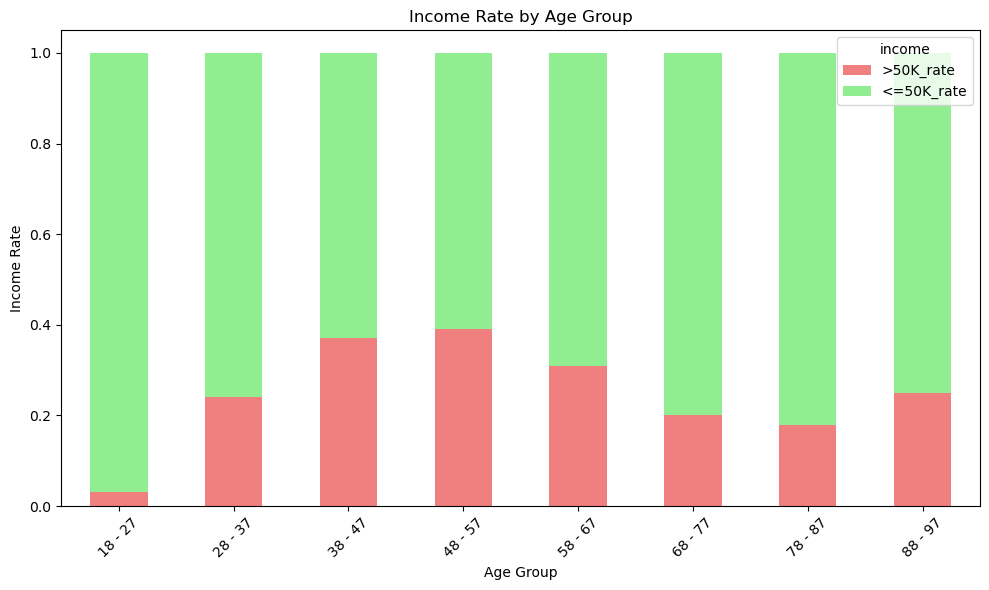

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))

age_income[['>50K_rate', '<=50K_rate']].plot(kind='bar', stacked=True, ax=ax, color=['lightcoral', 'lightgreen'])

ax.set_xlabel('Age Group')
ax.set_ylabel('Income Rate')
ax.set_title('Income Rate by Age Group')
ax.set_xticklabels(age_income.index, rotation=45)
plt.tight_layout()
plt.show()

# Analyzing by occupation

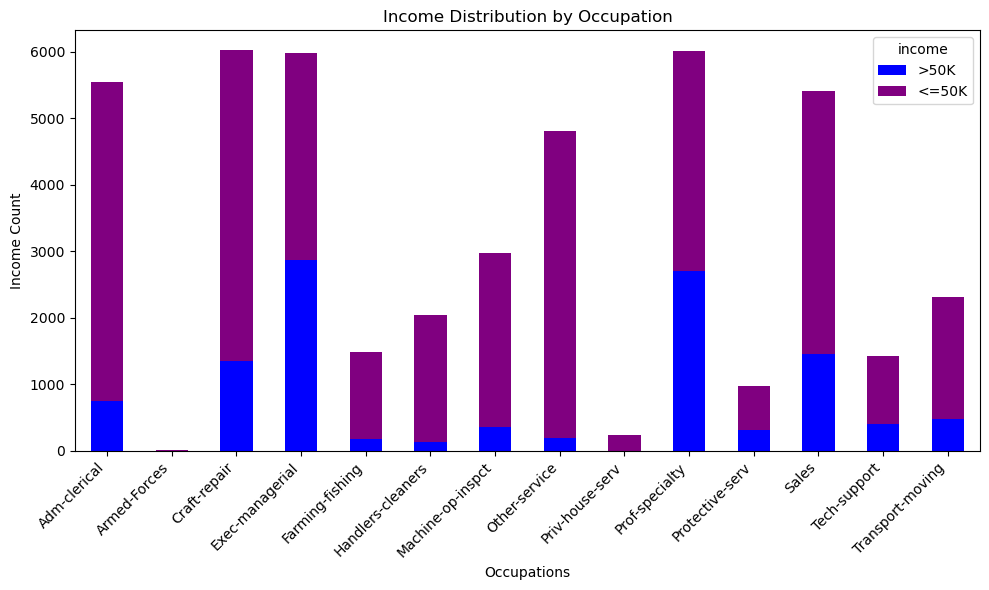

In [49]:
occupation_analysis = adult.groupby(["occupation", "income"]).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))
occupation_analysis[['>50K', '<=50K']].plot(kind='bar', stacked=True, ax=ax, color=['blue', 'purple'])

ax.set_xlabel('Occupations')
ax.set_ylabel('Income Count')
ax.set_title('Income Distribution by Occupation')
ax.set_xticklabels(occupation_analysis.index, rotation=45, ha="right")

plt.tight_layout()
plt.show()

# Count of Martial Status and average work hours by country

In [51]:
adult["marital-status"].value_counts()

average_work_hours = []

for (country, income), sub_df in adult.groupby(["native-country", "income"]):
    average_work_hours.append([country, income, round(sub_df["hours-per-week"].mean(), 2)])
average_work_hours = pd.DataFrame(average_work_hours, columns=["Country", "Income", "Mean Hours per Week"])
print(average_work_hours)


          Country Income  Mean Hours per Week
0        Cambodia  <=50K                41.29
1        Cambodia   >50K                43.89
2          Canada  <=50K                38.48
3          Canada   >50K                46.93
4           China  <=50K                37.75
..            ...    ...                  ...
76  United-States   >50K                45.72
77        Vietnam  <=50K                38.62
78        Vietnam   >50K                39.43
79     Yugoslavia  <=50K                38.53
80     Yugoslavia   >50K                43.38

[81 rows x 3 columns]


# Conclusion


In [53]:
# The dataset is checked with null values
# The Barplot represents the Income Rate by Age Group
# The second plot represent the Income by type of occupation
# Marital status and Averafe work hours by countries are found

